# K-Nearest  Neighbors Algorithm
> **Author:** Arun Kumar Pandey

Again we consider the 'user_data.csv' for the knn algorithms.

In [1]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt 

df_user =  pd.read_csv('User_Data.csv')

# Display the DataFrame
print(df_user.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [2]:
df_user

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# Importing the dataset  
X = df_user.iloc[:, [2, 3]].values  
y = df_user.iloc[:, 4].values  

# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

### Fitting K-NN classfier to the training data

Now we will fit the K-NN classifier to the training data. 
- To do this we will import the `KNeighborsClassifier` class of `Sklearn Neighbors` library. 
- After importing the class, we will create the `Classifier` object of the class. 
- The Parameter of this class will be:
    - `n_neighbors`: To define the required neighbors of the algorithm. Usually, it takes 5.
    - `metric='minkowski'`: This is the default parameter and it decides the distance between the points.
    - `p=2`: It is equivalent to the standard Euclidean metric.
  
- And then we will fit the classifier to the training data. Below is the code for it:

- **Euclidean Distance:** 
    
    $$d(p, q) = \left(\sum_{i=1}^n |p_i - q_i|^2\right)^{1/2}$$ 

- **Minkowski Distance:**

    $$d(p, q) = \left(\sum_{i=1}^n |p_i - q_i|^p\right)^{1/p}$$

In [6]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 

In [8]:
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

**Predicting the Test Result:** To predict the test set result, we will create a y_pred vector as we did in Logistic Regression. Below is the code for it:

In [10]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [12]:
pd.DataFrame(y_pred)

,0
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,1
98,1


**Creating the Confusion Matrix:**
Now we will create the Confusion Matrix for our K-NN model to see the accuracy of the classifier. Below is the code for it:

In [14]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

**Visualizing the Training set result:**
Now, we will visualize the training set result for K-NN model. The code will remain same as we did in Logistic Regression, except the name of the graph. Below is the code for it:

C:\Users\hp\AppData\Local\Temp\ipykernel_30952\3477366344.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


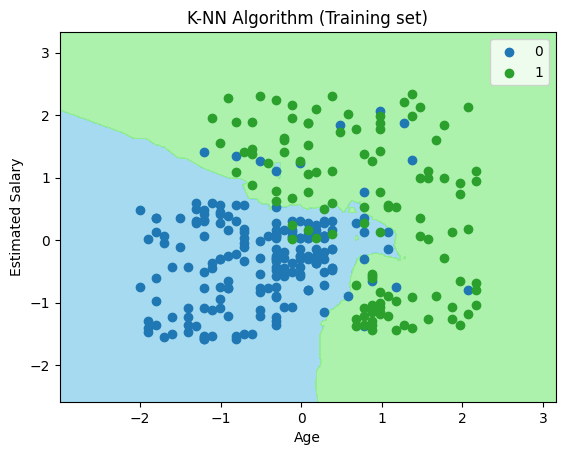

In [19]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = X_train, y_train  
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
                    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(['#87CEEB', '#90EE90']))

plt.xlim(X1.min(), X1.max())  
plt.ylim(X2.min(), X2.max())  

for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(['#1f77b4', '#2ca02c'])(i), label = j)  

plt.title('K-NN Algorithm (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  


C:\Users\hp\AppData\Local\Temp\ipykernel_30952\1327373421.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


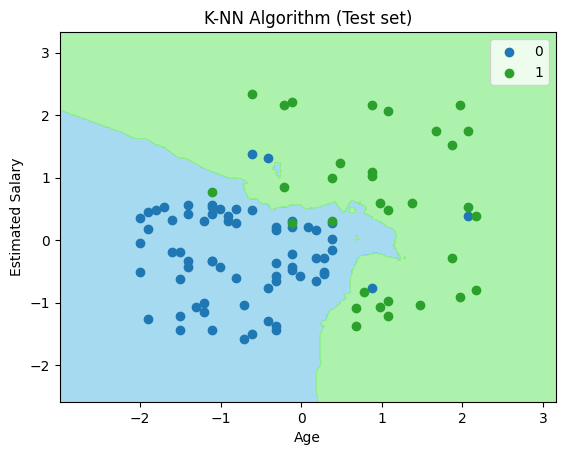

In [20]:
#Visulaizing the test set result  

x_set, y_set = X_test, y_test  
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
                    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(['#87CEEB', '#90EE90']))

plt.xlim(X1.min(), X1.max())  
plt.ylim(X2.min(), X2.max())  

for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(['#1f77b4', '#2ca02c'])(i), label = j)  

plt.title('K-NN Algorithm (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  


C:\Users\hp\AppData\Local\Temp\ipykernel_30952\1231252719.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
C:\Users\hp\AppData\Local\Temp\ipykernel_30952\1231252719.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1].scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


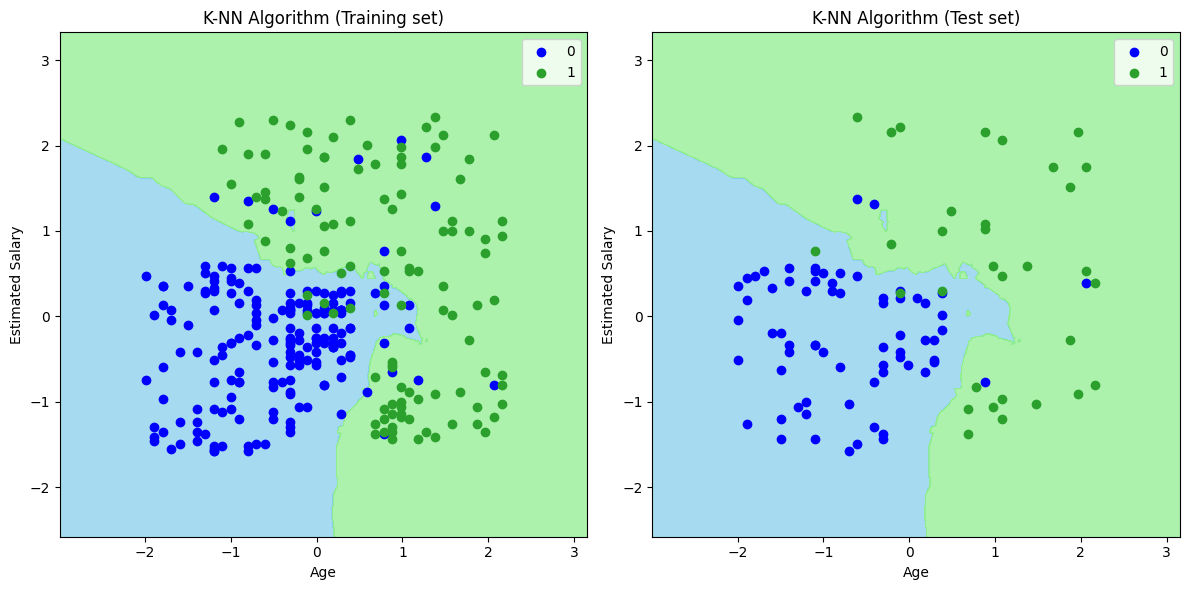

In [22]:
# Importing libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set up the figure with two subplots in one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visulaizing the training set result
x_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
axes[0].contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(['#87CEEB', '#90EE90']))
axes[0].set_xlim(X1.min(), X1.max())
axes[0].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[0].scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                    c=ListedColormap(['#0000FF', '#2ca02c'])(i), label=j)

axes[0].set_title('K-NN Algorithm (Training set)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Estimated Salary')
axes[0].legend()

# Visulaizing the test set result
x_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
axes[1].contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(['#87CEEB', '#90EE90']))
axes[1].set_xlim(X1.min(), X1.max())
axes[1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[1].scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                    c=ListedColormap(['#0000FF', '#2ca02c'])(i), label=j)

axes[1].set_title('K-NN Algorithm (Test set)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Estimated Salary')
axes[1].legend()

plt.tight_layout()
plt.show()


The output graph is different from the graph which we have occurred in Logistic Regression (For details, you can see https://arunp77.github.io/naive-byes.html).

**Training dataset:** It can be understood from the left (training set) in the below points:
- As we can see the graph is showing the blue point and green points. The green points are for Purchased(1) and blue Points for not Purchased(0) variable.
- The graph is showing an irregular boundary instead of showing any straight line or any curve because it is a K-NN algorithm, i.e., finding the nearest neighbor.
- The graph has classified users in the correct categories as most of the users who didn't buy the SUV are in the red region and users who bought the SUV are in the green region.
- The graph is showing good result but still, there are some green points in the red region and red points in the green region. But this is no big issue as by doing this model is prevented from overfitting issues.
- Hence our model is well trained.